In [7]:
from Networks import MLP
from Trainers import Burges_1D_Trainer
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [8]:
# 初始化模型
input_shape = (1,)  # 输入形状
output_shape = (1,)

model = MLP(input_shape, output_shape, hidden_layers=[64, 64, 64, 64, 64, 64, 64], activation_function="tanh")

In [9]:
u = 1
alpha = 1 
optimizer = optim.Adam(model.parameters(), lr=1e-3)

trainer = Burges_1D_Trainer(model, u, alpha, optimizer, lambda_pde=1e-3, device='cuda')

In [10]:
# 构造 collocation 点（用于计算 PDE 残差）
N_collocation = 1000
# 在区间 [0, 1] 上均匀采样
x_collocation = torch.linspace(0, 1, N_collocation).view(-1, 1)

# 定义边界点和边界条件（这里假设 phi(0)=0, phi(1)=e，可根据问题实际设置）
x_boundary = torch.tensor([[0.0], [1.0]])
phi_boundary = torch.tensor([[1.0], [np.e]])

In [11]:
# 开始训练
trainer.train(x_collocation, x_boundary, phi_boundary, epochs=5000, save_path='trained_model/pinn.pth')

Training Progress:   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1/5000, Total Loss: 4.7731e+00 | PDE Loss: 1.3531e-05 | BC Loss: 4.7731e+00
Epoch 101/5000, Total Loss: 8.3922e-03 | PDE Loss: 8.3855e+00 | BC Loss: 6.6492e-06
Epoch 201/5000, Total Loss: 3.5086e-03 | PDE Loss: 3.4234e+00 | BC Loss: 8.5192e-05
Epoch 301/5000, Total Loss: 1.4871e-03 | PDE Loss: 1.4586e+00 | BC Loss: 2.8508e-05
Epoch 401/5000, Total Loss: 7.0283e-04 | PDE Loss: 6.8868e-01 | BC Loss: 1.4152e-05
Epoch 501/5000, Total Loss: 2.4921e-03 | PDE Loss: 3.8400e-01 | BC Loss: 2.1081e-03
Epoch 601/5000, Total Loss: 3.1649e-04 | PDE Loss: 3.1498e-01 | BC Loss: 1.5083e-06
Epoch 701/5000, Total Loss: 2.3389e-04 | PDE Loss: 2.3315e-01 | BC Loss: 7.3961e-07
Epoch 801/5000, Total Loss: 2.2705e-04 | PDE Loss: 2.2446e-01 | BC Loss: 2.5953e-06
Epoch 901/5000, Total Loss: 1.6554e-04 | PDE Loss: 1.6513e-01 | BC Loss: 4.0878e-07
Epoch 1001/5000, Total Loss: 1.2440e-04 | PDE Loss: 1.2416e-01 | BC Loss: 2.3188e-07
Epoch 1101/5000, Total Loss: 9.4500e-04 | PDE Loss: 1.1853e-01 | BC Loss: 8.2

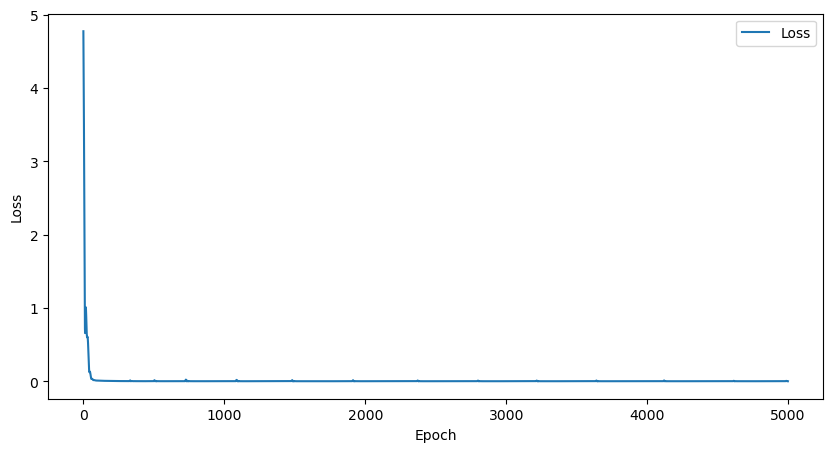

In [12]:
trainer.plot_loss()